## Analysis of Chicago Taxi Trips - Google Public Dataset

Overview
This dataset includes taxi trips from 2013 to the march 1st 2023, reported to the City of Chicago in its role as a regulatory agency. To protect privacy but allow for aggregate analyses, the Taxi ID is consistent for any given taxi medallion number but does not show the number, Census Tracts are suppressed in some cases, and times are rounded to the nearest 15 minutes. Due to the data reporting process, not all trips are reported but the City believes that most are. For more information about this dataset and how it was created, see this post  on the City of Chicago's blog.
This dataset was created in April 11, 2017 and the last update was on Sep 20,2022. 

It has 59,407,734 rows.

Fields:

unique_key		          Unique identifier for the trip.	

taxi_id	                  A unique identifier for the taxi.	

trip_start_timestamp	  When the trip started, rounded to the nearest 15 minutes.	

trip_end_timestamp		  When the trip ended, rounded to the nearest 15 minutes.	

trip_seconds	          Time of the trip in seconds.

trip_miles                Distance of the trip in miles.	

pickup_census_tract	      The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips.	

dropoff_census_tract      The Census Tract where the trip ended. For privacy, this Census Tract is not shown for some trips.	

pickup_community_area	  The Community Area where the trip began.	

dropoff_community_area	  The Community Area where the trip ended.	

fare				      The fare for the trip.	

tips		              The tip for the trip. Cash tips generally will not be recorded.	

tolls                     The tolls for the trip.	

extras                    Extra charges for the trip.	

trip_total	              Total cost of the trip, the total of the fare, tips, tolls, and extras.
	
payment_type	          Type of payment for the trip.	

company                   The taxi company.	

pickup_latitude           The latitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy.	

pickup_longitude          The longitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy.	

pickup_location	          The location of the center of the pickup census tract or the community area if the census tract has been hidden for privacy.	

dropoff_latitude	      The latitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy.	

dropoff_longitude         The longitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy.	

dropoff_location	      The location of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy.

In [169]:
#import libraries
from google.cloud import bigquery
import pydata_google_auth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install scipy
import scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# authenticate to Google APIs with user credentials.
credentials = pydata_google_auth.get_user_credentials(['https://www.googleapis.com/auth/bigquery'])

client = bigquery.Client(project='chicago-taxi-trips-381417', credentials=credentials)

In [3]:
# overview of the dataset
query = """ SELECT *
            FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            LIMIT 15"""
overview_df = client.query(query).to_dataframe()

In [4]:
overview_df.columns


Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location'],
      dtype='object')

In [5]:
overview_df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,ddbb8cdf22c3faebffa83dcd0004b898b5f8fe33,bc1bb780dd36d5c571b58fbf28f2942790b6ec912bc3a5...,2016-05-17 08:15:00+00:00,2016-05-17 08:15:00+00:00,247,0.5,17031839100,17031839100,32,32,...,0.0,5.00,Cash,5 Star Taxi,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
1,b6ace3e5ab1a58207291931d5f6ccb261889aa7f,cb3b129b896b84945d48c37d3e040346b414c550279836...,2017-01-24 18:45:00+00:00,2017-01-24 18:45:00+00:00,472,0.6,17031320100,17031081403,32,8,...,1.5,10.00,Credit Card,Checker Taxi,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259)
2,2d7beb384eb60b934b758052707870249c571e65,00ce2d9c23209022f971cf517dbf6db5dec1bd49464e47...,2016-07-23 01:00:00+00:00,2016-07-23 01:15:00+00:00,534,2.1,<NA>,<NA>,2,<NA>,...,0.0,7.60,Cash,Norshore Cab,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),NaN,NaN,None
3,d7047279269cf0a13b957e6593a728657c712ef7,4ae32e2eb244ce143800e0c40055e537cc50e3358a07ce...,2016-05-03 13:30:00+00:00,2016-05-03 13:45:00+00:00,373,0.4,17031081201,17031081403,8,8,...,0.0,8.25,Credit Card,5 Star Taxi,41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259)
4,9949a80c4a1caea43fe77c3c17259f0d066e9849,a38c3f58d93d8dd441f8766e126a7618c2a393f8cfae28...,2017-03-24 15:30:00+00:00,2017-03-24 15:30:00+00:00,544,1.3,17031080202,17031081500,8,8,...,1.0,8.25,Cash,Yellow Cab,41.905858,-87.630865,POINT (-87.6308650266 41.9058577688),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)


WITH A BETTER UNDERSTANDING OF THE DATASET, THE INSIGHTS WE'D LIKE TO OBTAIN ARE:
- What are the maximum, minimum and average fares, duration, and distance of rides by type of payment?
- What are the most popular payment types?
- How has the incidence of each payment method evolved throughout the years?

In [23]:
# What are the maximum, minimum and average fares, duration, and distance of rides by type of payment?
# What is the most popular payment type?
query = """ SELECT 
                payment_type,   
                FORMAT('%3.2f',
                    MAX(fare)) AS maximum_fare,
                FORMAT('%3.2f',
                    MIN(fare)) AS minimum_fare,
                FORMAT('%3.2f',
                    AVG(fare)) AS avg_fare,
                FORMAT('%3.2f',
                    STDDEV(fare)) AS std_dev_fare,
                    MAX(trip_seconds) AS maximum_time,
                    MIN(trip_seconds) AS minimum_time,
                    AVG(trip_seconds) AS avg_time,
                    STDDEV(trip_seconds) AS std_dev_time,
                FORMAT('%3.2f',
                    MAX(trip_miles)) AS maximum_distance,
                FORMAT('%3.2f',
                    MIN(trip_miles)) AS minimum_distance,
                FORMAT('%3.2f',
                    AVG(trip_miles)) AS avg_distance,
                FORMAT('%3.2f',
                    STDDEV(trip_miles)) AS std_dev_distance,
                COUNT(1) AS rides
            FROM
                `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            GROUP BY
                payment_type"""


metrics_by_payment_df = client.query(query).to_dataframe()
#metrics_by_payment_df.to_csv("data/metrics_by_payment_df.csv")

In [162]:
#OR Load metrics_by_payment_df from csv
metrics_by_payment_df = pd.read_csv("data/metrics_by_payment_df.csv",index_col='Unnamed: 0')

In [163]:
metrics_by_payment_df.sort_values(by='rides', ascending=False)

,payment_type,maximum_fare,minimum_fare,avg_fare,std_dev_fare,maximum_time,minimum_time,avg_time,std_dev_time,maximum_distance,minimum_distance,avg_distance,std_dev_distance,rides
2,Cash,9999.99,0.00,11.55,59.34,86400,0,726.970389,1411.953767,3370.00,0.0,2.74,9.19,117165692
3,Credit Card,9783.32,0.00,16.11,15.47,86374,0,900.746265,1014.792021,3460.00,0.0,4.25,13.50,83195039
5,Mobile,2140.05,0.00,15.73,11.67,85917,0,887.669951,916.213040,3430.53,0.0,3.87,11.29,1760488
9,Prcard,600.00,0.00,22.03,9.97,85867,0,1375.961312,1180.210467,618.91,0.0,7.18,4.27,1656370
4,Unknown,9999.99,0.00,18.75,19.68,82440,0,1203.858099,1062.296421,923.30,0.0,3.85,6.35,1293550
1,No Charge,8912.00,0.00,14.53,30.15,84660,0,866.070130,1623.041826,1995.30,0.0,2.00,8.34,821036
6,Dispute,1883.79,0.00,13.66,18.29,82020,0,817.809090,974.496224,1897.60,0.0,3.26,12.40,86805
7,Pcard,1000.05,0.00,9.50,17.55,82860,0,520.690459,1449.108364,47.00,0.0,2.44,2.89,36874
10,Split,150.00,0.25,14.39,13.84,12940,20,801.395410,726.373703,51.40,0.0,4.39,5.75,3442
8,Prepaid,93.50,2.90,22.18,15.64,6856,0,1286.008825,956.735447,39.09,0.0,7.54,6.65,1813


In [165]:
# convert time from second to minutes
mbp_inminutes_df = metrics_by_payment_df.copy()
mbp_inminutes_df[['maximum_time','minimum_time','avg_time', 'std_dev_time']] = metrics_by_payment_df[['maximum_time','minimum_time','avg_time', 'std_dev_time']].apply(lambda x: x/60)
mbp_inminutes_df.sort_values(by='rides', ascending=False)

,payment_type,maximum_fare,minimum_fare,avg_fare,std_dev_fare,maximum_time,minimum_time,avg_time,std_dev_time,maximum_distance,minimum_distance,avg_distance,std_dev_distance,rides
2,Cash,9999.99,0.00,11.55,59.34,1440.000000,0.000000,12.116173,23.532563,3370.00,0.0,2.74,9.19,117165692
3,Credit Card,9783.32,0.00,16.11,15.47,1439.566667,0.000000,15.012438,16.913200,3460.00,0.0,4.25,13.50,83195039
5,Mobile,2140.05,0.00,15.73,11.67,1431.950000,0.000000,14.794499,15.270217,3430.53,0.0,3.87,11.29,1760488
9,Prcard,600.00,0.00,22.03,9.97,1431.116667,0.000000,22.932689,19.670174,618.91,0.0,7.18,4.27,1656370
4,Unknown,9999.99,0.00,18.75,19.68,1374.000000,0.000000,20.064302,17.704940,923.30,0.0,3.85,6.35,1293550
1,No Charge,8912.00,0.00,14.53,30.15,1411.000000,0.000000,14.434502,27.050697,1995.30,0.0,2.00,8.34,821036
6,Dispute,1883.79,0.00,13.66,18.29,1367.000000,0.000000,13.630152,16.241604,1897.60,0.0,3.26,12.40,86805
7,Pcard,1000.05,0.00,9.50,17.55,1381.000000,0.000000,8.678174,24.151806,47.00,0.0,2.44,2.89,36874
10,Split,150.00,0.25,14.39,13.84,215.666667,0.333333,13.356590,12.106228,51.40,0.0,4.39,5.75,3442
8,Prepaid,93.50,2.90,22.18,15.64,114.266667,0.000000,21.433480,15.945591,39.09,0.0,7.54,6.65,1813


[]

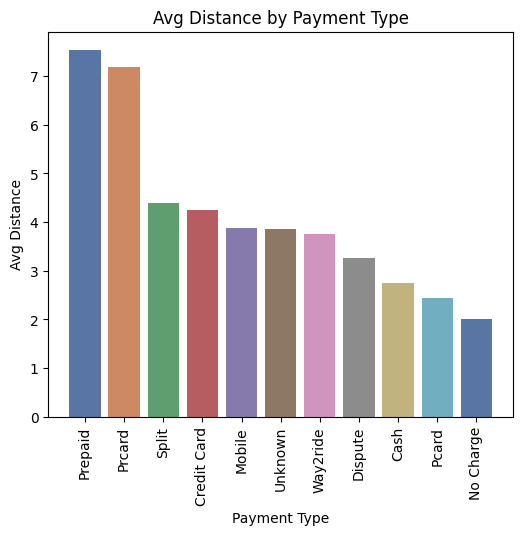

In [187]:
# What is average distance of trips per payment method?

# Set the width and height of the figure
plt.figure(figsize=(6,5))
# Add title
plt.title("Avg Distance by Payment Type")
plt.xticks(rotation=90)

ax = sns.barplot(data=metrics_by_payment_df.sort_values(by='avg_distance', ascending=False), x='payment_type', y='avg_distance',palette='deep')
#ax.bar_label(container=ax.containers[0], fontsize=6, padding=1)
ax.set(ylabel = 'Avg Distance', xlabel='Payment Type')
ax.plot()

[]

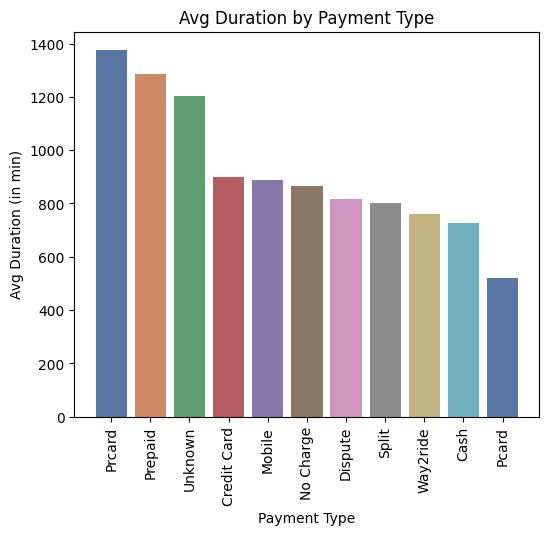

In [190]:
# What is average time of trips per payment method?

# Set the width and height of the figure
plt.figure(figsize=(6,5))
# Add title
plt.title("Avg Duration by Payment Type")
plt.xticks(rotation=90)

ax = sns.barplot(data=metrics_by_payment_df.sort_values(by='avg_time', ascending=False), x='payment_type', y='avg_time',palette='deep')
#ax.bar_label(container=ax.containers[0], fontsize=6, padding=1)
ax.set(ylabel = 'Avg Duration (in min)', xlabel='Payment Type')
ax.plot()

[]

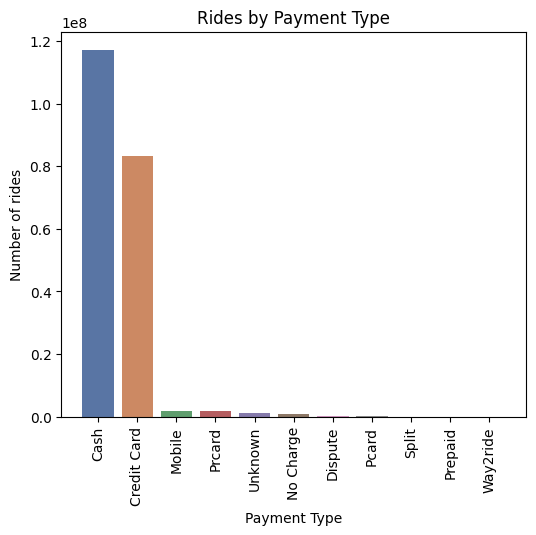

In [191]:
# What are the most popular payment types?

# Set the width and height of the figure
plt.figure(figsize=(6,5))
# Add title
plt.title("Rides by Payment Type")
plt.xticks(rotation=90)

ax = sns.barplot(data=metrics_by_payment_df.sort_values(by='rides', ascending=False), x='payment_type', y='rides',palette='deep')
#ax.bar_label(container=ax.containers[0], fontsize=6, padding=1)
ax.set(ylabel = 'Number of rides', xlabel='Payment Type')
ax.plot()

By far, Cash and Credit cards are the most used payment methods. However, this is taking into account the whole time period for which we have infomation (2013-2023). I'd like to see if there have been changes over time.

In [72]:
# How has the incidence of each payment method evolved throughout the years?
query = """ SELECT 
                payment_type, 
                EXTRACT(YEAR
                FROM
                    trip_start_timestamp) AS year,   
                COUNT(1) AS rides
            FROM
                `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            GROUP BY
                payment_type,
                year"""
metrics_by_payment_year_df = client.query(query).to_dataframe()
#metrics_by_payment_year_df.to_csv("data/metrics_by_payment_year_df.csv")

In [147]:
#OR Load metrics_by_payment_df from csv
metrics_by_payment_year_df = pd.read_csv("data/metrics_by_payment_year_df.csv",index_col='Unnamed: 0')

In [84]:
metrics_by_payment_year_df

,payment_type,year,rides
0,Cash,2022,2073691
1,Credit Card,2017,11069263
2,Prcard,2022,587015
3,Dispute,2013,21222
4,Pcard,2017,5652
...,...,...,...
84,Pcard,2013,7951
85,Prepaid,2018,970
86,Unknown,2021,333585
87,Dispute,2020,2485


In [148]:
metrics_by_payment_year_df['rides'] = metrics_by_payment_year_df['rides'].astype(int)


In [152]:
pivot_df = pd.pivot_table(metrics_by_payment_year_df, values='rides', index='payment_type', columns='year')
pivot_df.fillna(value=0, inplace=True)
pivot_df.sort_values(by=2013, ascending=False)
#view_pivot_df = pivot_df.applymap(lambda x: '{:,.0f}'.format(x))

year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
payment_type,,,,,,,,,,,
Cash,18708574.0,23869771.0,18352681.0,17817335.0,13741223.0,10763641.0,8086401.0,1894992.0,1598282.0,2073691.0,259101.0
Credit Card,8099371.0,13301197.0,13829042.0,13774278.0,11069263.0,9684133.0,7854492.0,1509349.0,1294674.0,2480885.0,298355.0
No Charge,287740.0,154683.0,140011.0,98850.0,59400.0,36791.0,32576.0,4949.0,2407.0,3149.0,480.0
Unknown,91911.0,48886.0,45081.0,37731.0,35212.0,55471.0,110821.0,173251.0,333585.0,307443.0,54158.0
Dispute,21222.0,12118.0,10044.0,11951.0,9007.0,6737.0,6772.0,2485.0,2969.0,3291.0,209.0
Pcard,7951.0,6673.0,6374.0,5403.0,5652.0,4295.0,526.0,0.0,0.0,0.0,0.0
Prcard,531.0,1751.0,2294.0,10713.0,43597.0,60928.0,154762.0,239639.0,441580.0,587015.0,113560.0
Mobile,0.0,0.0,0.0,0.0,14208.0,116711.0,229468.0,63992.0,274176.0,926589.0,135344.0
Prepaid,0.0,0.0,0.0,0.0,35.0,970.0,622.0,174.0,4.0,8.0,0.0


In [150]:
proportion_df = pivot_df.apply(lambda x: x / x.sum())
proportion_df.sort_values(by=2013, ascending=False)

year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
payment_type,,,,,,,,,,,
Cash,0.687378,0.638313,0.566694,0.561063,0.550098,0.519202,0.490786,0.487291,0.404866,0.324924,0.300858
Credit Card,0.297582,0.355694,0.427013,0.433748,0.443132,0.467131,0.476711,0.388124,0.327958,0.388727,0.346438
No Charge,0.010572,0.004136,0.004323,0.003113,0.002378,0.001775,0.001977,0.001273,0.000610,0.000493,0.000557
Unknown,0.003377,0.001307,0.001392,0.001188,0.001410,0.002676,0.006726,0.044551,0.084502,0.048173,0.062886
Dispute,0.000780,0.000324,0.000310,0.000376,0.000361,0.000325,0.000411,0.000639,0.000752,0.000516,0.000243
Pcard,0.000292,0.000178,0.000197,0.000170,0.000226,0.000207,0.000032,0.000000,0.000000,0.000000,0.000000
Prcard,0.000020,0.000047,0.000071,0.000337,0.001745,0.002939,0.009393,0.061622,0.111858,0.091979,0.131861
Mobile,0.000000,0.000000,0.000000,0.000000,0.000569,0.005630,0.013927,0.016455,0.069452,0.145186,0.157156
Prepaid,0.000000,0.000000,0.000000,0.000000,0.000001,0.000047,0.000038,0.000045,0.000001,0.000001,0.000000


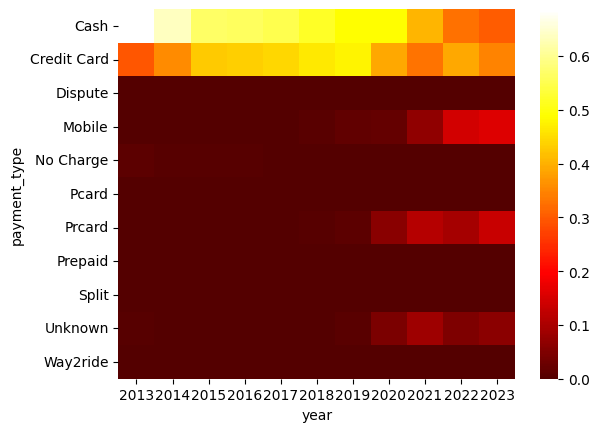

In [151]:
# plot the pivot table as a heatmap
sns.heatmap(proportion_df, cmap='hot', center=0.3)
plt.show()

The proportion of trips (related to the total trips of that year) that were paid in cash has been decreasing constantly since 2013, while the use of credit card increased steadely until 2020, when it declined and went back to almost 2014 values. 

The use of mobile payment has been picking up since 2018, however in relation to other types of payment is continues to represent a very small proportion of the total trips. Something similar happens to the payment method Prcard. 

It is worth noticing that for the last 4 years, there is a greater number of rides for which the payment method is Unknown, and in 2021 got to represent 4% of all the trips of the year.

Other posssible questions to add:
Tip analysis